# INN HOTEL PROJECT

In [ ]:
!pip install pandas==1.5.3 numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 statsmodels==0.14.1 -q --user

In [267]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [208]:
data = pd.read_csv("INNHotelsGroup.csv")
data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


## Univariate Analysis

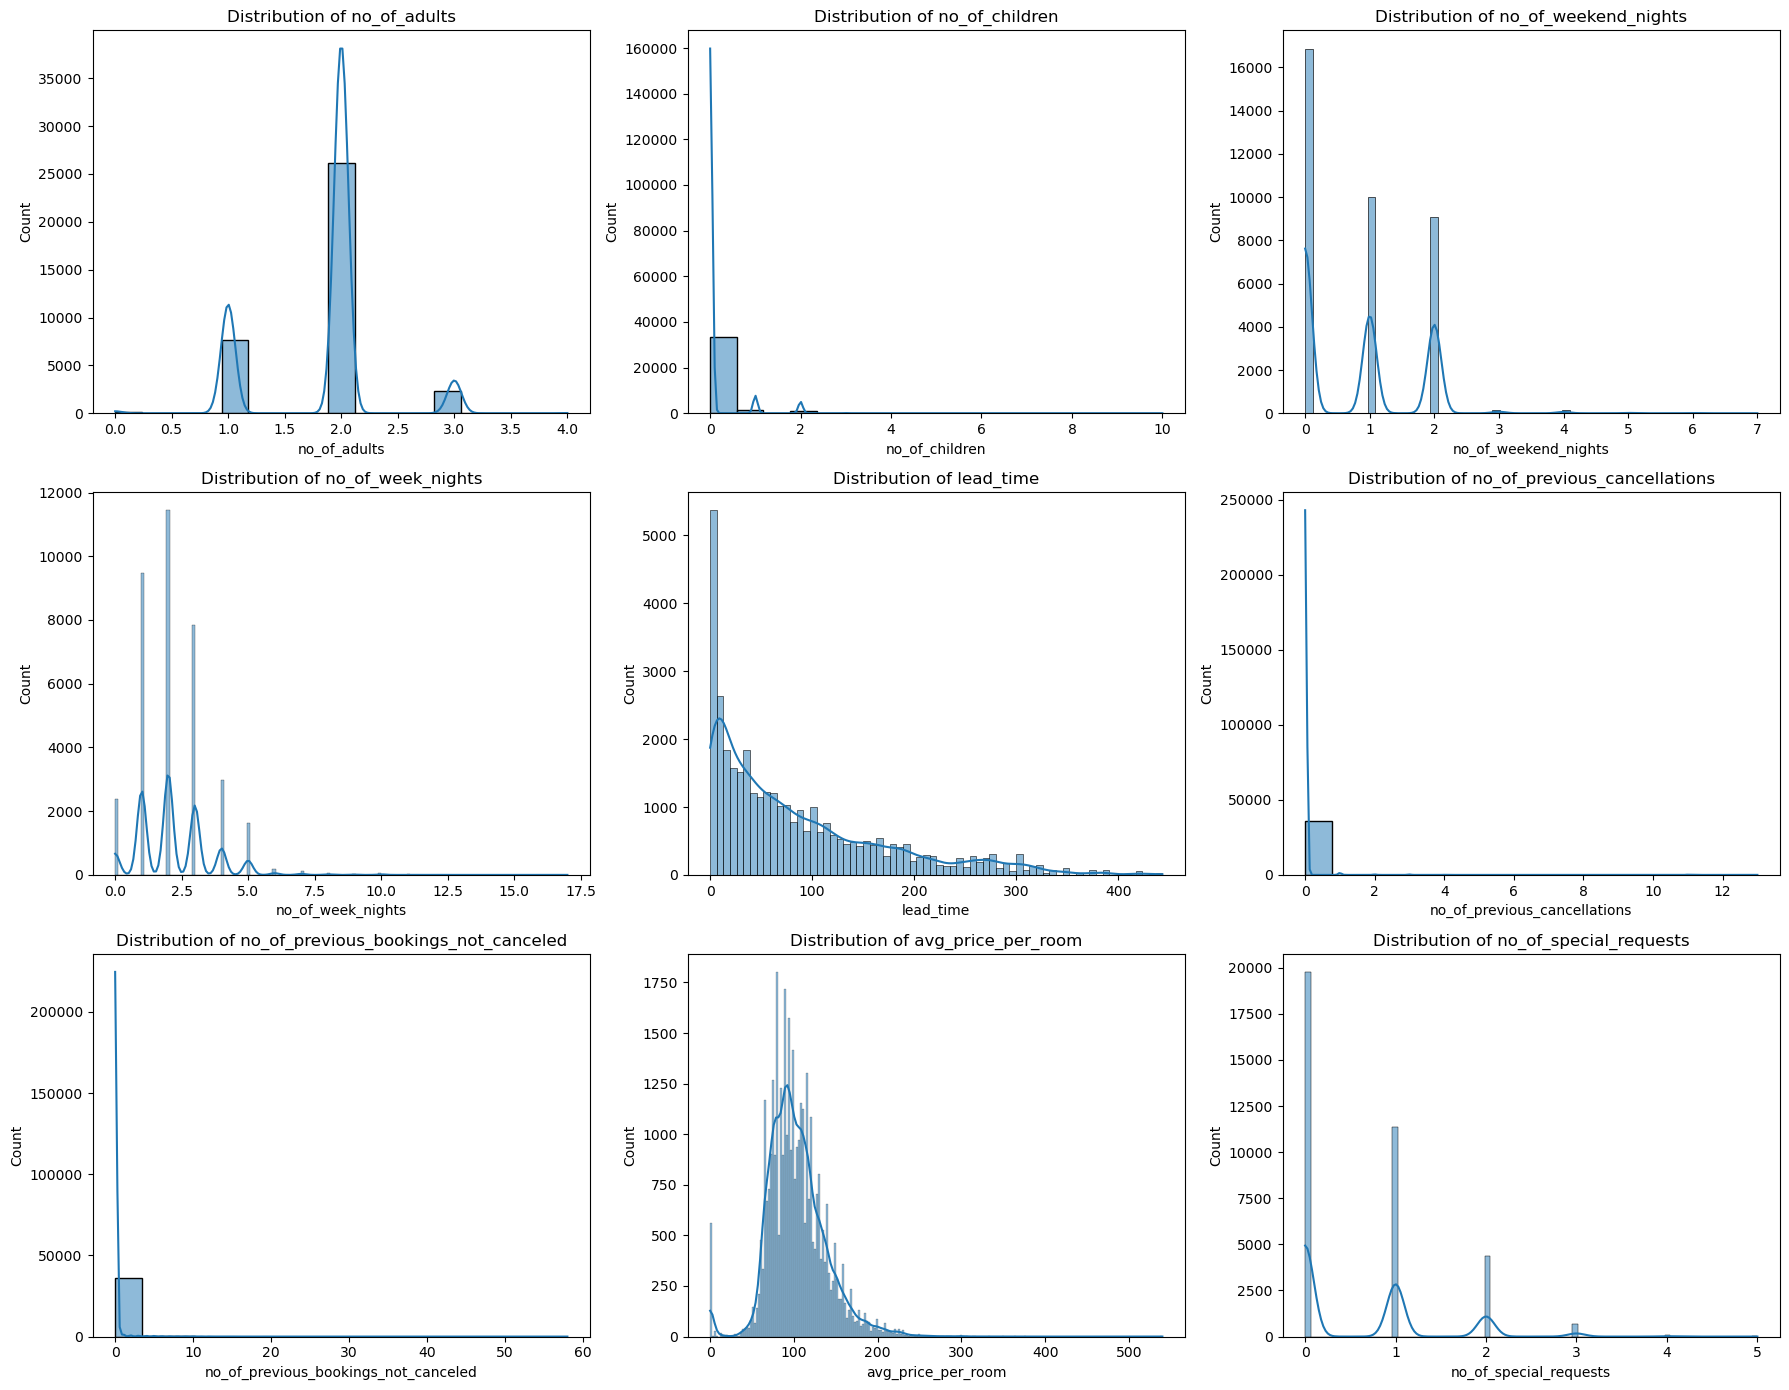

In [210]:
# Convert 'booking_status' to a binary variable
data['booking_status'] = data['booking_status'].apply(lambda x: 1 if x == 'Canceled' else 0)

# Define numerical features
numerical_features = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 
                      'lead_time', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 
                      'avg_price_per_room', 'no_of_special_requests']

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 14))

# Plot histograms for each numerical feature
for i, feature in enumerate(numerical_features):
    sns.histplot(data[feature], kde=True, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

No. of Adults: Mostly 1 or 2 adults per booking.
No. of Children: Majority of bookings have no children.
No. of Weekend Nights: Common values are 0, 1, and 2 weekend nights.
No. of Week Nights: Most bookings have 1 to 3 week nights.
Lead Time: Skewed distribution with many bookings having short lead times, but a significant number with very long lead times.
No. of Previous Cancellations: Most customers have no previous cancellations.
No. of Previous Bookings Not Canceled: Many customers have no previous bookings.
Average Price per Room: Wide range of prices with a peak around lower prices.
No. of Special Requests: Majority of bookings have 0 or 1 special request.

## Bivariate Analysis

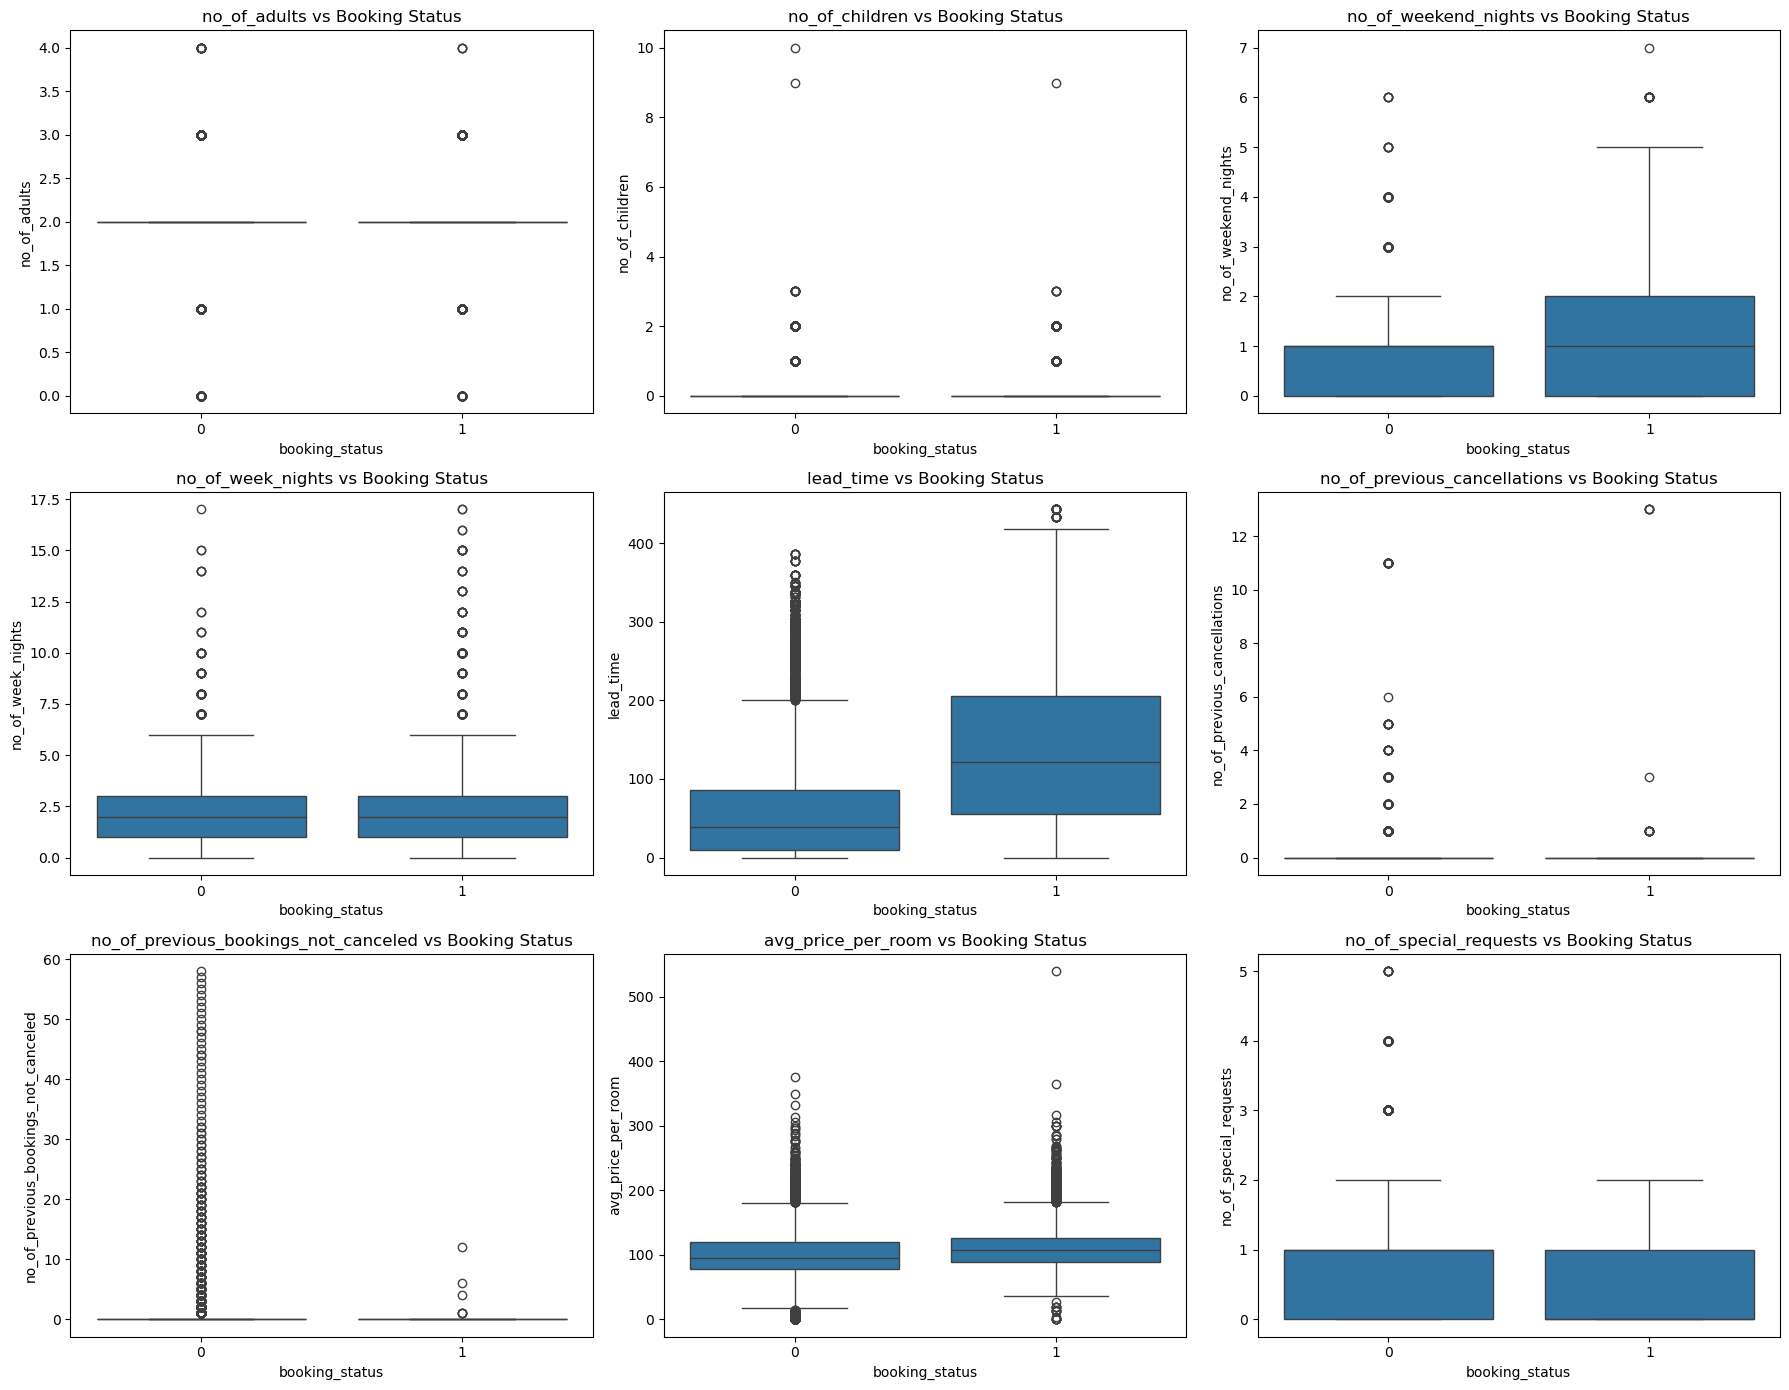

In [211]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 14))

# Plot box plots for each numerical feature against 'booking_status'
for i, feature in enumerate(numerical_features):
    sns.boxplot(x='booking_status', y=feature, data=data, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f'{feature} vs Booking Status')

plt.tight_layout()
plt.show()

The box plots reveal the relationships between the numerical features and the booking status (canceled or not canceled):

No. of Adults: Slightly higher cancellations for bookings with 2 adults.
No. of Children: No clear pattern.
No. of Weekend Nights: No significant difference.
No. of Week Nights: No significant difference.
Lead Time: Higher lead time tends to have higher cancellations.
No. of Previous Cancellations: Bookings with previous cancellations are more likely to be canceled.
No. of Previous Bookings Not Canceled: No clear pattern.
Average Price per Room: Higher prices tend to have higher cancellations.
No. of Special Requests: More special requests tend to have lower cancellations.

## Busiest month in the hotel

C:\Users\chedeema\AppData\Local\Temp\ipykernel_12100\1574854014.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_bookings.index, y=monthly_bookings.values, palette='viridis')


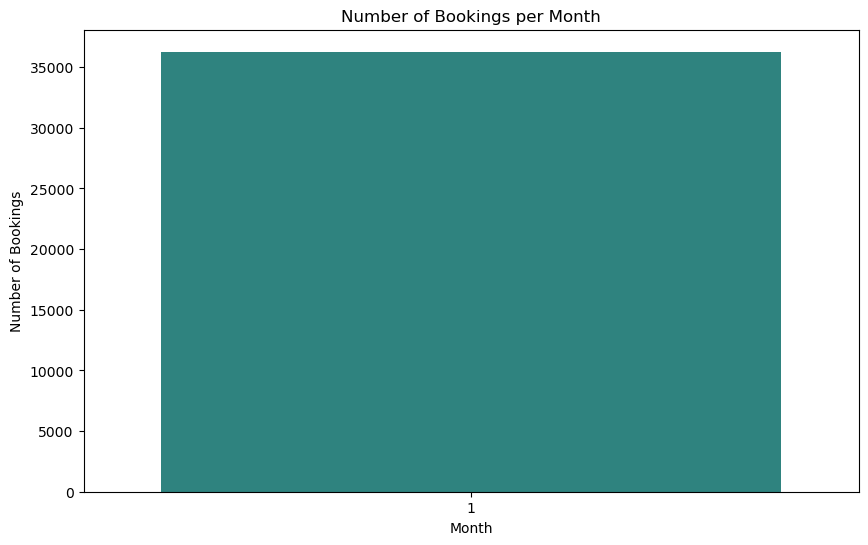

In [214]:
# Extract the month from the 'arrival_date' and create a new column
data['arrival_date'] = pd.to_datetime(data['arrival_date'])
data['arrival_month'] = data['arrival_date'].dt.month

# Count bookings per month
monthly_bookings = data['arrival_month'].value_counts().sort_index()

# Plot the busiest months
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_bookings.index, y=monthly_bookings.values, palette='viridis')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.title('Number of Bookings per Month')
plt.show()

## Market segment distribution

C:\Users\chedeema\AppData\Local\Temp\ipykernel_12100\1805950769.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=market_segment_counts.index, y=market_segment_counts.values, palette='viridis')


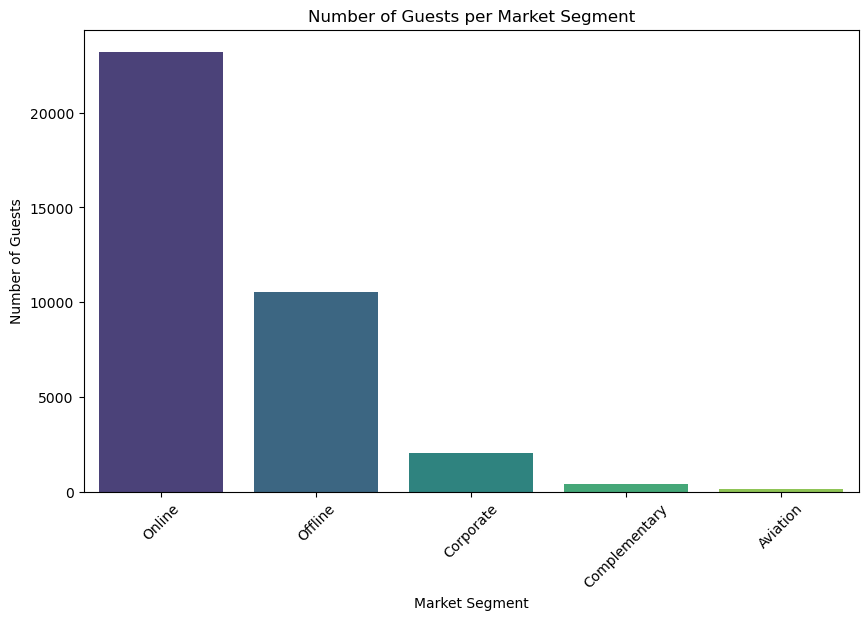

In [217]:
# Count the number of guests per market segment
market_segment_counts = data['market_segment_type'].value_counts()

# Plot the market segment distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=market_segment_counts.index, y=market_segment_counts.values, palette='viridis')
plt.xlabel('Market Segment')
plt.ylabel('Number of Guests')
plt.title('Number of Guests per Market Segment')
plt.xticks(rotation=45)
plt.show()

##  Room Prices Across Different Market Segments

C:\Users\chedeema\AppData\Local\Temp\ipykernel_12100\2687745913.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='market_segment_type', y='avg_price_per_room', data=data, palette='viridis')


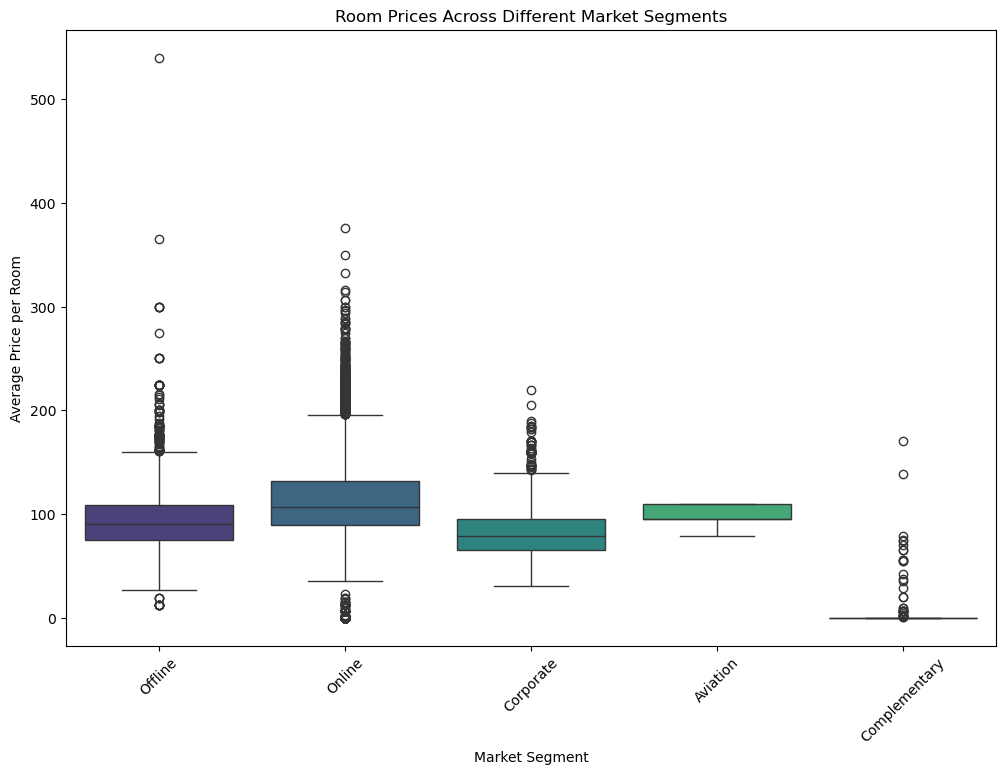

In [219]:
# Plot room prices across different market segments
plt.figure(figsize=(12, 8))
sns.boxplot(x='market_segment_type', y='avg_price_per_room', data=data, palette='viridis')
plt.xlabel('Market Segment')
plt.ylabel('Average Price per Room')
plt.title('Room Prices Across Different Market Segments')
plt.xticks(rotation=45)
plt.show()

## Percentage of Bookings Canceled

In [221]:
# Calculate the percentage of bookings canceled
cancel_percentage = data['booking_status'].mean() * 100
print(f'Percentage of Bookings Canceled: {cancel_percentage:.2f}%')

Percentage of Bookings Canceled: 32.76%


## Percentage of Repeating Guests Who Cancel

In [223]:
# Calculate the percentage of repeating guests who cancel
repeating_guests = data[data['repeated_guest'] == 1]
repeat_cancel_percentage = repeating_guests['booking_status'].mean() * 100
print(f'Percentage of Repeating Guests Who Cancel: {repeat_cancel_percentage:.2f}%')

Percentage of Repeating Guests Who Cancel: 1.72%


## Impact of Special Requirements on Booking Cancellation

C:\Users\chedeema\AppData\Local\Temp\ipykernel_12100\947384100.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='booking_status', y='no_of_special_requests', data=data, palette='viridis')


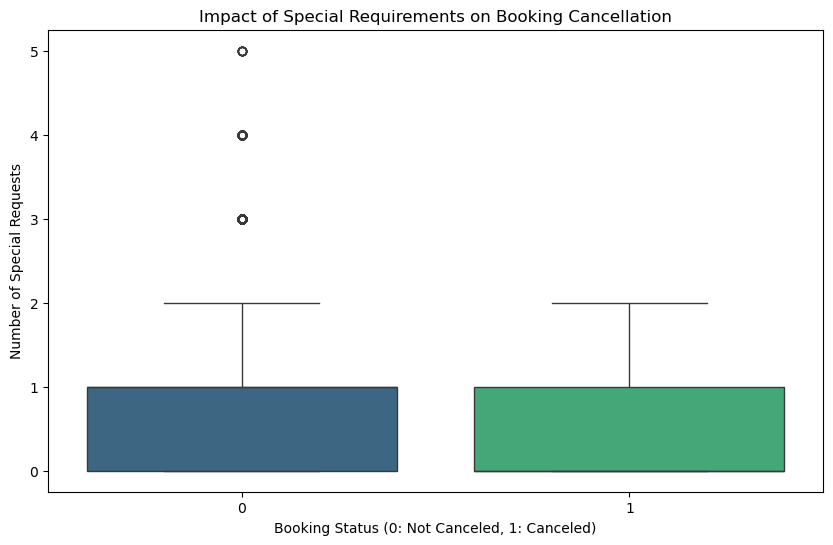

Average Number of Special Requests for Canceled Bookings: 0.33
Average Number of Special Requests for Non-Canceled Bookings: 0.76


In [225]:
# Plot the relationship between special requests and booking cancellations
plt.figure(figsize=(10, 6))
sns.boxplot(x='booking_status', y='no_of_special_requests', data=data, palette='viridis')
plt.xlabel('Booking Status (0: Not Canceled, 1: Canceled)')
plt.ylabel('Number of Special Requests')
plt.title('Impact of Special Requirements on Booking Cancellation')
plt.show()

# Calculate the average number of special requests for canceled and non-canceled bookings
special_requests_cancelled = data[data['booking_status'] == 1]['no_of_special_requests'].mean()
special_requests_not_cancelled = data[data['booking_status'] == 0]['no_of_special_requests'].mean()
print(f'Average Number of Special Requests for Canceled Bookings: {special_requests_cancelled:.2f}')
print(f'Average Number of Special Requests for Non-Canceled Bookings: {special_requests_not_cancelled:.2f}')

In [227]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [229]:
# Outlier detection using IQR method
for feature in numerical_features:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    print(f'{feature} has {len(outliers)} outliers')

# Treat outliers as needed


no_of_adults has 10167 outliers
no_of_children has 2698 outliers
no_of_weekend_nights has 21 outliers
no_of_week_nights has 324 outliers
lead_time has 1331 outliers
no_of_previous_cancellations has 338 outliers
no_of_previous_bookings_not_canceled has 812 outliers
avg_price_per_room has 1696 outliers
no_of_special_requests has 761 outliers


## Data preprocessing for modelling

In [316]:
# Identify categorical and numerical features
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
numerical_features = data.select_dtypes(exclude=['object']).columns.tolist()

categorical_features, numerical_features

(['Booking_ID',
  'type_of_meal_plan',
  'room_type_reserved',
  'market_segment_type'],
 ['no_of_adults',
  'no_of_children',
  'no_of_weekend_nights',
  'no_of_week_nights',
  'required_car_parking_space',
  'lead_time',
  'arrival_year',
  'arrival_month',
  'arrival_date',
  'repeated_guest',
  'no_of_previous_cancellations',
  'no_of_previous_bookings_not_canceled',
  'avg_price_per_room',
  'no_of_special_requests',
  'booking_status'])

In [318]:
from sklearn.preprocessing import LabelEncoder

# Create derived features
data['total_nights'] = data['no_of_weekend_nights'] + data['no_of_week_nights']
data['total_people'] = data['no_of_adults'] + data['no_of_children']

# Encode categorical variables
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Drop the 'Booking_ID' as it is not useful for modeling
data = data.drop(columns=['Booking_ID'])

# Display the first few rows of the modified dataset
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_nights,total_people
0,2,0,1,2,0,0,0,224,2017,1,1970-01-01 00:00:00.000000002,3,0,0,0,65.00,0,0,3,2
1,2,0,2,3,3,0,0,5,2018,1,1970-01-01 00:00:00.000000006,4,0,0,0,106.68,1,0,5,2
2,1,0,2,1,0,0,0,1,2018,1,1970-01-01 00:00:00.000000028,4,0,0,0,60.00,0,0,3,1
3,2,0,0,2,0,0,0,211,2018,1,1970-01-01 00:00:00.000000020,4,0,0,0,100.00,0,0,2,2
4,2,0,1,1,3,0,0,48,2018,1,1970-01-01 00:00:00.000000011,4,0,0,0,94.50,0,0,2,2


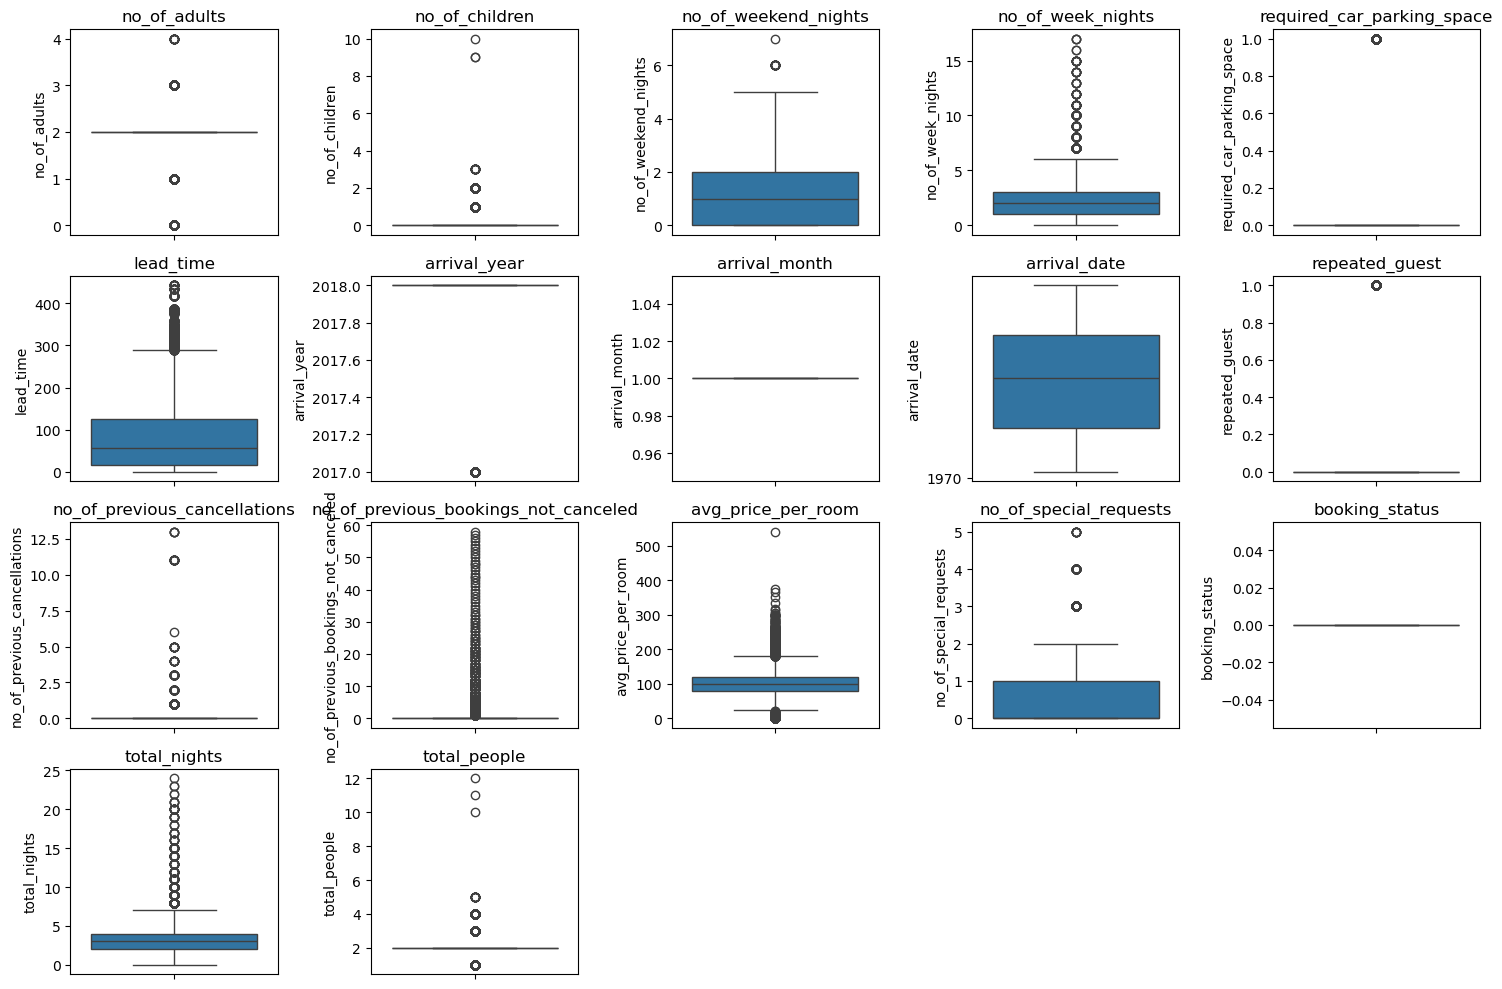

In [320]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplots for numerical features to detect outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features + ['total_nights', 'total_people']):
    plt.subplot(4, 5, i + 1)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

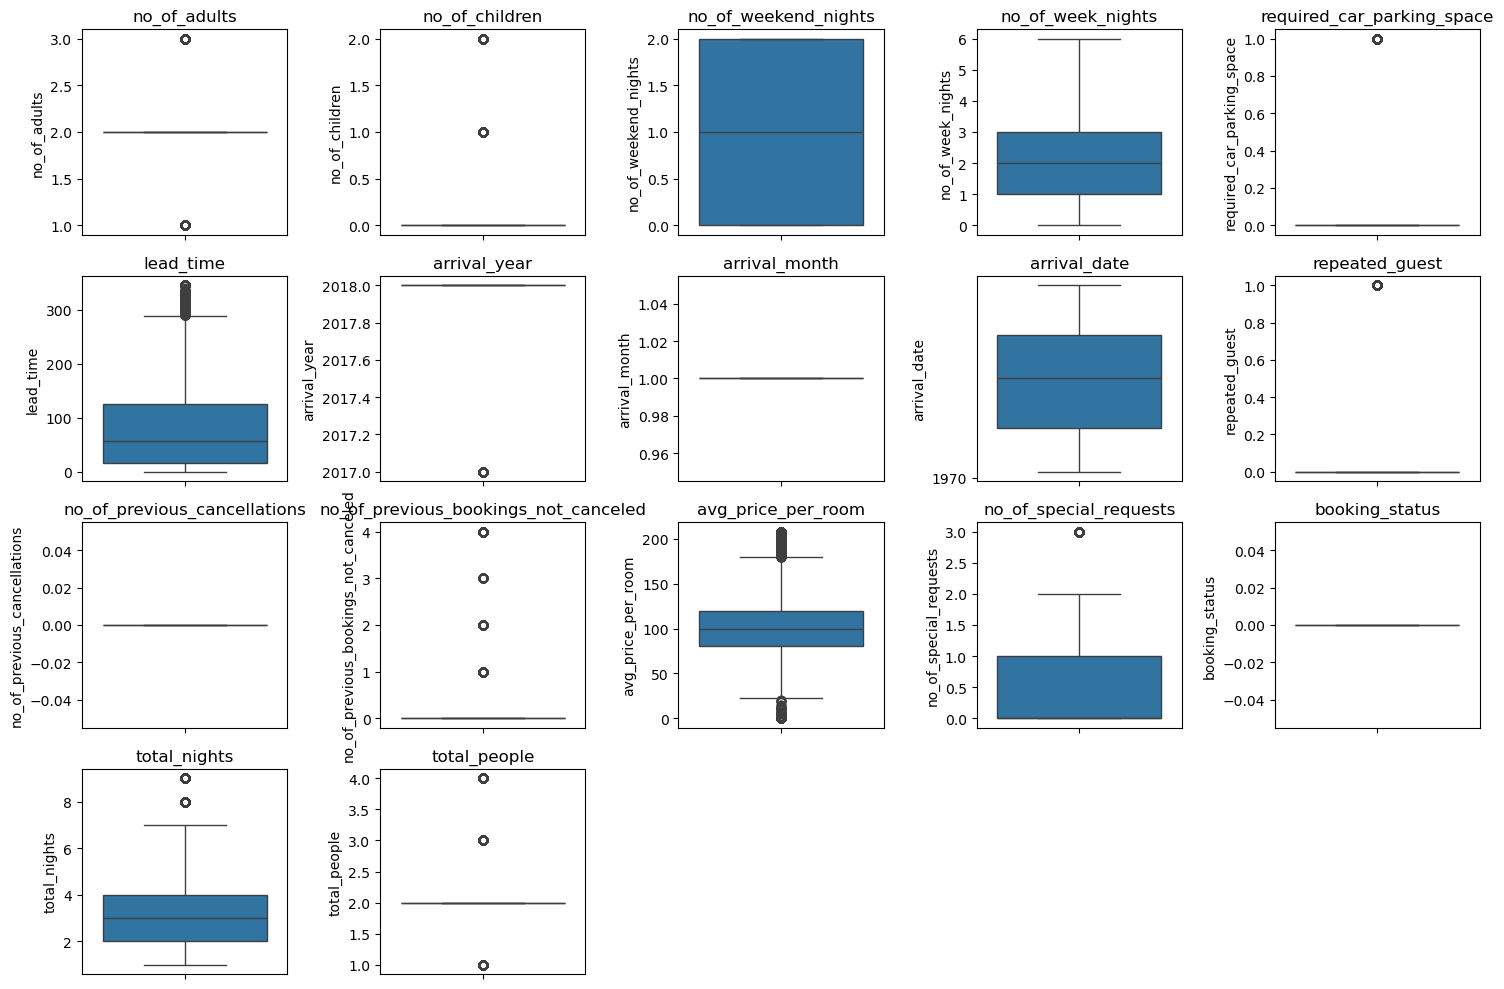

In [322]:
# Cap the outliers at the 1st and 99th percentiles
for col in numerical_features + ['total_nights', 'total_people']:
    lower_bound = data[col].quantile(0.01)
    upper_bound = data[col].quantile(0.99)
    data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)

# Check for any outliers after capping
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features + ['total_nights', 'total_people']):
    plt.subplot(4, 5, i + 1)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

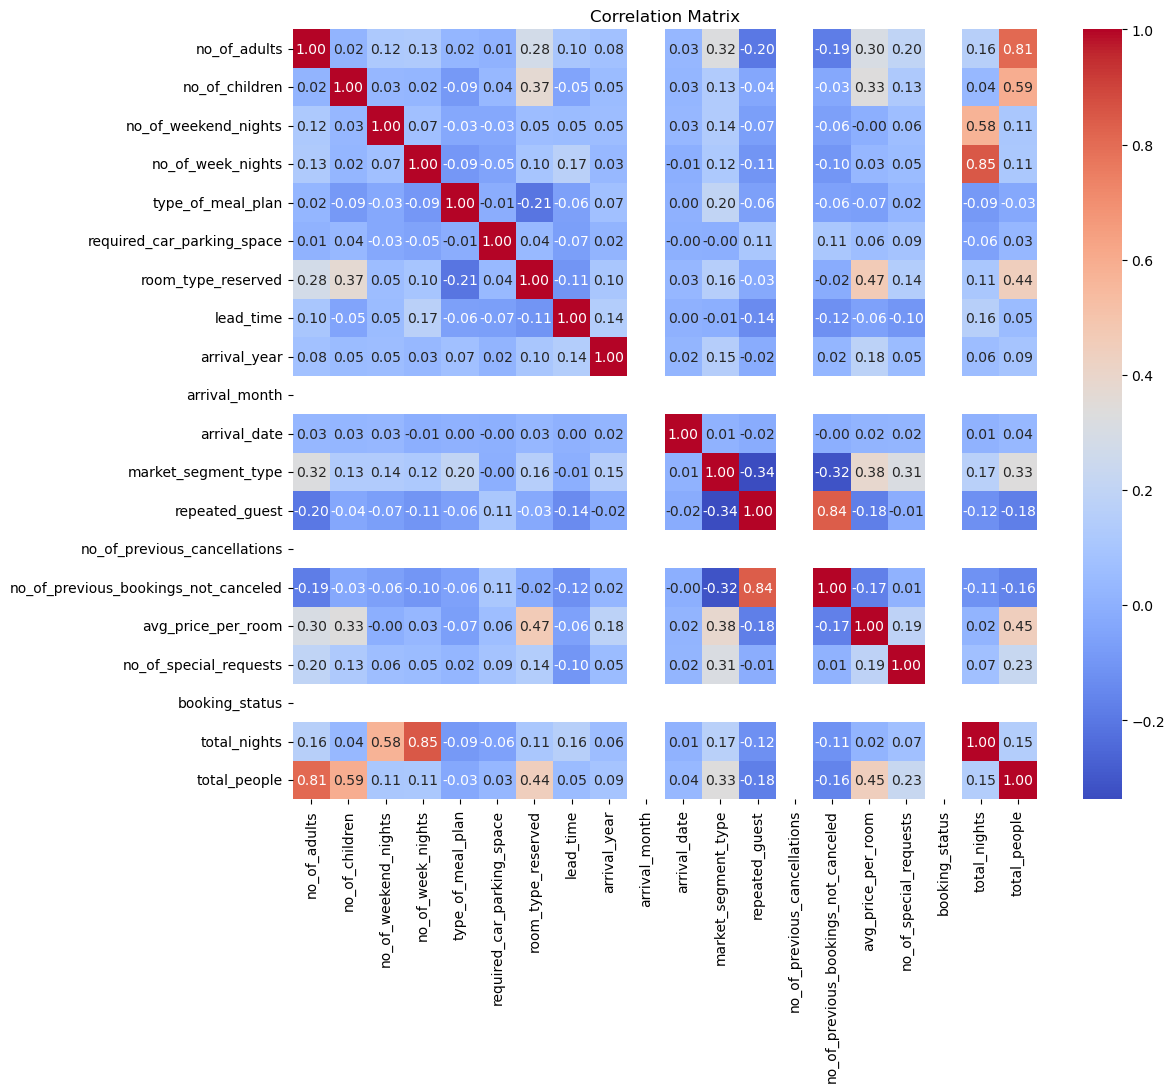

In [324]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [334]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

# Assuming data is already loaded and preprocessed
# Drop the target variable 'booking_status' and prepare features
X = data.drop(columns=['booking_status'])

# Ensure all columns are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Remove columns with only one unique value (constant columns)
constant_columns = [col for col in X.columns if X[col].nunique() <= 1]
X = X.drop(columns=constant_columns)

# Drop rows with NaN values that might result from conversion errors
X = X.dropna()

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Set a threshold for VIF (commonly 10)
high_vif_features = vif_data[vif_data['VIF'] > 10]['Feature']

# Remove features with high VIF
X = X.drop(columns=high_vif_features)

# Output the features with high VIF that were removed
print("Removed features due to high VIF:", high_vif_features.tolist())

Removed features due to high VIF: ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'arrival_year', 'market_segment_type', 'avg_price_per_room', 'total_nights', 'total_people']


In [336]:
from sklearn.model_selection import train_test_split

# Target variable
y = data['booking_status']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Output shapes of the splits for verification
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (25392, 8)
X_test shape: (10883, 8)
y_train shape: (25392,)
y_test shape: (10883,)


In [338]:
X_train.head(), y_train.head()

(       type_of_meal_plan  required_car_parking_space  room_type_reserved  \
 29580                  0                           0                   0   
 6325                   0                           0                   0   
 33899                  0                           0                   3   
 720                    0                           0                   0   
 22120                  0                           0                   0   
 
        lead_time  arrival_date  repeated_guest  \
 29580        200            29               0   
 6325          79            24               0   
 33899         78             6               0   
 720           61             4               0   
 22120        201             1               0   
 
        no_of_previous_bookings_not_canceled  no_of_special_requests  
 29580                                     0                       0  
 6325                                      0                       1  
 33899         

In [360]:
# Check class distribution in the original dataset
print("Original dataset class distribution:")
print(data['booking_status'].value_counts())

# Check class distribution in the training set
print("\nTraining set class distribution:")
print(y_train.value_counts())

# Check class distribution in the test set
print("\nTest set class distribution:")
print(y_test.value_counts())

Original dataset class distribution:
booking_status
0    36275
Name: count, dtype: int64

Training set class distribution:
booking_status
0    25392
Name: count, dtype: int64

Test set class distribution:
booking_status
0    10883
Name: count, dtype: int64


In [346]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder

# Initialize the Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
tree_model.fit(X_train, y_train)

# Predict on the test set
y_pred_tree = tree_model.predict(X_test)

# Evaluate model performance
tree_accuracy = accuracy_score(y_test, y_pred_tree)
tree_conf_matrix = confusion_matrix(y_test, y_pred_tree)
tree_classification_report = classification_report(y_test, y_pred_tree)

tree_accuracy, tree_conf_matrix, tree_classification_report

C:\Users\chedeema\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


(1.0,
 array([[10883]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     10883\n\n    accuracy                           1.00     10883\n   macro avg       1.00      1.00      1.00     10883\nweighted avg       1.00      1.00      1.00     10883\n')

In [354]:
# Encode categorical variables
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Drop the target variable 'booking_status' and prepare features
X = data.drop(columns=['booking_status'])

# Convert all columns to numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Remove columns with only one unique value (constant columns)
constant_columns = [col for col in X.columns if X[col].nunique() <= 1]
X = X.drop(columns=constant_columns)

# Drop rows with NaN values that might result from conversion errors
X = X.dropna()
y = data['booking_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid for pruning
param_grid = {
    'max_depth': [5, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

# Initialize the Decision Tree model with GridSearch for hyperparameter tuning
tree_model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='accuracy')

# Train the model using GridSearch
grid_search.fit(X_train, y_train)

# Get the best model from GridSearch
best_tree_model = grid_search.best_estimator_

# Predict on the test set with the pruned model
y_pred_tree_pruned = best_tree_model.predict(X_test)

# Evaluate the pruned model's performance
pruned_tree_accuracy = accuracy_score(y_test, y_pred_tree_pruned)
pruned_tree_conf_matrix = confusion_matrix(y_test, y_pred_tree_pruned)
pruned_tree_classification_report = classification_report(y_test, y_pred_tree_pruned)

pruned_tree_accuracy, pruned_tree_conf_matrix, pruned_tree_classification_report, best_tree_model.get_params()

C:\Users\chedeema\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


(1.0,
 array([[10883]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     10883\n\n    accuracy                           1.00     10883\n   macro avg       1.00      1.00      1.00     10883\nweighted avg       1.00      1.00      1.00     10883\n',
 {'ccp_alpha': 0.0,
  'class_weight': None,
  'criterion': 'gini',
  'max_depth': 5,
  'max_features': None,
  'max_leaf_nodes': None,
  'min_impurity_decrease': 0.0,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'min_weight_fraction_leaf': 0.0,
  'monotonic_cst': None,
  'random_state': 42,
  'splitter': 'best'})